# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [ ]:
# Your code here :
# Define class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]
# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.suptitle("Random Samples from CIFAR-10", fontsize=16)

for i in range(10):
    indices = np.where(y_train.flatten() == i)[0]  # Get indices of images from class i
    random_indices = np.random.choice(indices, 10, replace=False)  # Select 10 random images
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[random_indices[j]])
        ax.axis("off")
        if j == 0:
            ax.set_ylabel(class_names[i], fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Shape of y_train after one-hot encoding:", y_train.shape)
print("Shape of y_test after one-hot encoding:", y_test.shape)

Shape of y_train after one-hot encoding: (50000, 10)
Shape of y_test after one-hot encoding: (10000, 10)


In [11]:
# Normalize the images to range [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Shape of x_train after normalization:", x_train.shape)
print("Shape of x_test after normalization:", x_test.shape)

Shape of x_train after normalization: (50000, 32, 32, 3)
Shape of x_test after normalization: (10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [19]:
from keras.backend import clear_session
clear_session()

In [21]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    MaxPooling2D(pool_size=(2, 2)),  
    Flatten(),
    Dense(100, activation="relu"),  
    Dense(10, activation="softmax")  
])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [23]:
# Your code here :
model.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(),
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1483 - loss: 2.2779 - val_accuracy: 0.2213 - val_loss: 2.1923
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2464 - loss: 2.1527 - val_accuracy: 0.2892 - val_loss: 2.0496
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2976 - loss: 2.0198 - val_accuracy: 0.3238 - val_loss: 1.9550
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3265 - loss: 1.9412 - val_accuracy: 0.3381 - val_loss: 1.8973
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3430 - loss: 1.8903 - val_accuracy: 0.3467 - val_loss: 1.8716
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3528 - loss: 1.8605 - val_accuracy: 0.3561 - val_loss: 1.8366
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3650 - loss: 1.8293 - val_accuracy: 0.3752 - val_loss: 1.8017
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3758 - loss: 1.7971 - val_accuracy: 0.3796 - v

*   Plot the cross entropy loss curve and the accuracy curve

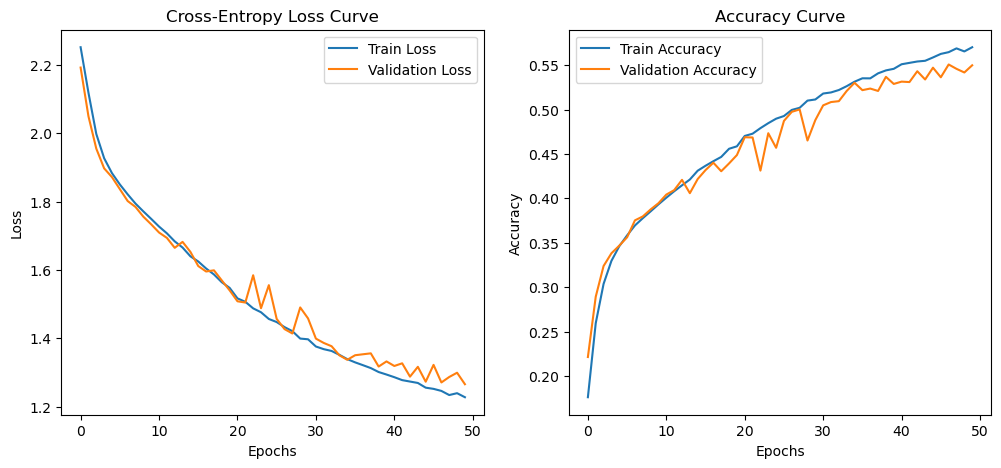

In [25]:
# Your code here :
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss Curve")
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [27]:
from keras.backend import clear_session
clear_session()

In [29]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define a simplified VGG-like model
model_vgg = Sequential()

# Block 1: two Conv layers + MaxPooling
model_vgg.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model_vgg.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2,2)))

# Flatten + Dense
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))

# Compile the model
model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),       # you can add momentum or try Adam, e.g. SGD(lr=0.01, momentum=0.9)
    metrics=['accuracy']
)

model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [31]:
# Your code here :
history_vgg = model_vgg.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.1420 - loss: 2.2755 - val_accuracy: 0.2371 - val_loss: 2.1523
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.2602 - loss: 2.1046 - val_accuracy: 0.2985 - val_loss: 2.0025
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.2971 - loss: 1.9852 - val_accuracy: 0.3289 - val_loss: 1.9002
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.3268 - loss: 1.9127 - val_accuracy: 0.3407 - val_loss: 1.8656
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.3513 - loss: 1.8631 - val_accuracy: 0.3586 - val_loss: 1.8056
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.3642 - loss: 1.8100 - val_accuracy: 0.3827 - val_loss: 1.7731
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.3837 - loss: 1.7647 - val_accuracy: 0.3885 - val_loss: 1.7468
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.3969 - loss: 1.7189 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

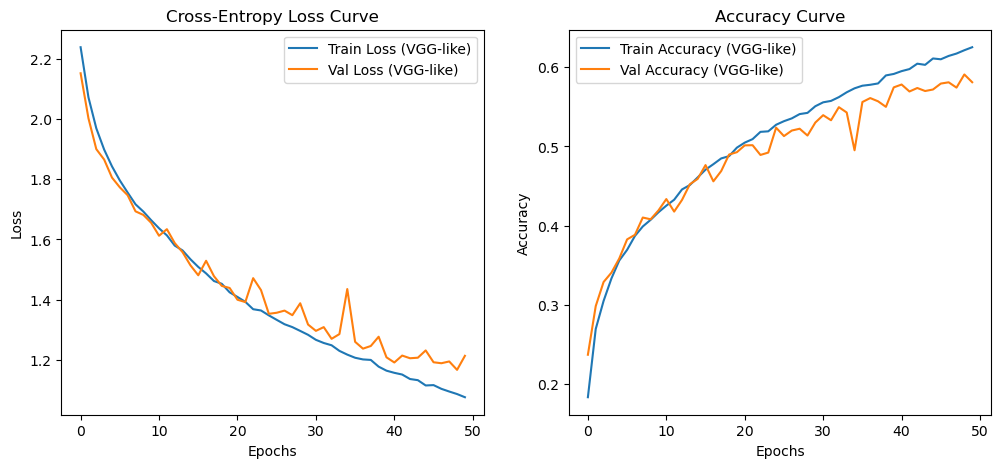

Final Training Accuracy (VGG-like): 0.625
Final Validation Accuracy (VGG-like): 0.581


In [33]:
# Your code here :
import matplotlib.pyplot as plt

# Plot training & validation loss for VGG-like model
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_vgg.history["loss"], label="Train Loss (VGG-like)")
plt.plot(history_vgg.history["val_loss"], label="Val Loss (VGG-like)")
plt.title("Cross-Entropy Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot training & validation accuracy for VGG-like model
plt.subplot(1,2,2)
plt.plot(history_vgg.history["accuracy"], label="Train Accuracy (VGG-like)")
plt.plot(history_vgg.history["val_accuracy"], label="Val Accuracy (VGG-like)")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Print final accuracies for a quick numeric comparison
train_acc_vgg = history_vgg.history['accuracy'][-1]
val_acc_vgg = history_vgg.history['val_accuracy'][-1]
print(f"Final Training Accuracy (VGG-like): {train_acc_vgg:.3f}")
print(f"Final Validation Accuracy (VGG-like): {val_acc_vgg:.3f}")

**Comment on the observation**

*  1. Deeper Model Typically Performs Better
      By stacking multiple convolution layers, your model can learn more complex features, usually improving the validation accuracy over          the simpler, single-conv-layer model.
      
   2. 	Potential for Further Improvement
	•	Increase the number of blocks (e.g., 2–3 more blocks of Conv2D + Conv2D + MaxPooling2D), following a more classic VGG pattern (e.g.,         32 → 64 → 128 filters).
*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [49]:
# Your code here :


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [51]:
from keras.backend import clear_session
clear_session()

In [55]:
# Your code here :
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model_vgg = Sequential()


model_vgg.add(Input(shape=(32,32,3)))


model_vgg.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vgg.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2,2)))


model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))

model_vgg.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,137,290 (8.15 MB)

 Trainable params: 2,137,290 (8.15 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.2497 - loss: 2.0336 - val_accuracy: 0.4766 - val_loss: 1.4842
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.4502 - loss: 1.5222 - val_accuracy: 0.5206 - val_loss: 1.3766
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.4963 - loss: 1.4059 - val_accuracy: 0.5657 - val_loss: 1.2365
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.5395 - loss: 1.3033 - val_accuracy: 0.5874 - val_loss: 1.1718
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5602 - loss: 1.2482 - val_accuracy: 0.6044 - val_loss: 1.1261
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5786 - loss: 1.1923 - val_accuracy: 0.6271 - val_loss: 1.0829
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5968 - loss: 1.1508 - val_accuracy: 0.6424 - val_loss: 1.0478
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.6159 - loss: 1.1027 - val_accuracy: 0.6552 - v

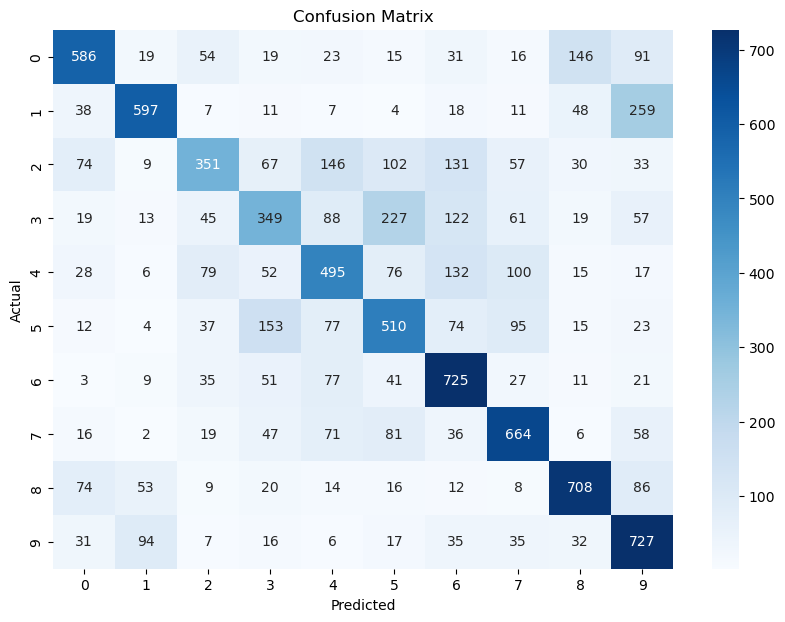

In [99]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(10, activation='softmax')  # Correct output layer for 10 classes
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

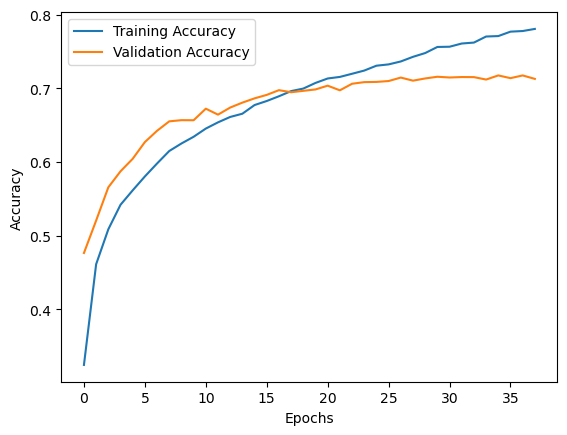

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7209 - loss: 0.8167
Test Accuracy: 0.7152
Test Loss: 0.8300


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns and relationships beyond simple linear mappings


_

2 - Key Differences between sigmoid and softmax:

•	Sigmoid: Outputs a probability between 0 and 1 for each neuron independently. Used for binary       classification.
	•	Softmax: Outputs a probability distribution across multiple classes, ensuring the sum of            all outputs is 1. Used for multi-class classification.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

• Categorical Crossentropy: Used for multi-class classification with one-hot encoded labels.
• Binary Crossentropy: Used for binary classification or multi-label classification where each label is treated independently.
_
